# Blackjack Solution through a proportional adjustment approach

In [30]:
from BlackjackEnv import BlackjackEnv
import matplotlib.pyplot as plt
from tqdm import tqdm

In [31]:
# Initial threshold value for training
init_threshold: int = 20
n_games_per_episode: int = 1_000
n_episodes: int = 10
n_turns_per_episode: int = 3

In [32]:
def reward(ending_val):
    if ending_val > 21:
        return False
    return (ending_val / 21) ** 3

In [33]:
def train_episodes(threshold):
    total_reward = 0
    for i in range(n_games_per_episode):
        env = BlackjackEnv(1)

        for _ in range(n_turns_per_episode):
            if env.hands[0] < threshold:
                env.add_card(0)

        if env.hands[0] > 21:
            total_reward += reward(env.hands[0])
    return total_reward / n_games_per_episode

In [37]:
def optimize_threshold(threshold=init_threshold):
    reward_over_time = []
    for i in tqdm(range(n_episodes)):
        reward_over_time.append(train_episodes(threshold))

        if i < 1:
            threshold -= 1
            continue

        gradient = 0.01 + (reward_over_time[-1] - reward_over_time[-2]) / 2

        if gradient > 0:
            threshold -= 1
        if gradient < 0:
            threshold += 1
    return threshold, reward_over_time

In [38]:
resultant_threshold, rewards = optimize_threshold()

100%|██████████| 100/100 [01:19<00:00,  1.27it/s]


Final threshold: -80


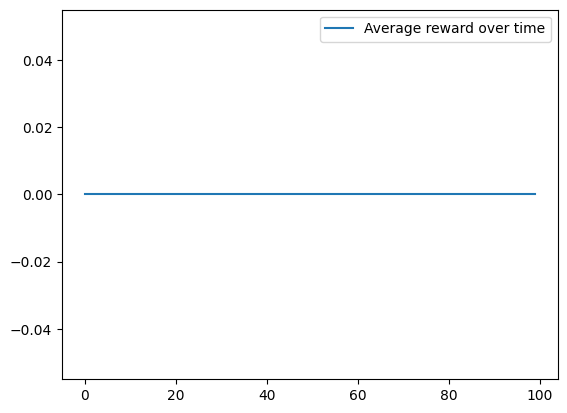

In [40]:
print(f"Final threshold: {resultant_threshold}")
plt.plot(rewards, label="Average reward over time")
plt.legend()
plt.show()